<a href="https://colab.research.google.com/github/Loshini24/PRODIGY_DS_04/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = {
    "username": ["@user1", "@user2", "@user3", "@user4", "@user5"],
    "tweet": [
        "I love the new TechNova phone! Great camera and battery life!",
        "TechNova's service is terrible. Never buying again.",
        "The latest update is okay, but the UI is confusing.",
        "Amazing design, fast performance. TechNova nailed it!",
        "Very disappointed with TechNova. Expected better quality."
    ]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.to_excel("social_media_data.xlsx", index=False)

In [5]:
print("Sample data saved as social_media_data.xlsx")
df.head()

Sample data saved as social_media_data.xlsx


,username,tweet
0,@user1,I love the new TechNova phone! Great camera an...
1,@user2,TechNova's service is terrible. Never buying a...
2,@user3,"The latest update is okay, but the UI is confu..."
3,@user4,"Amazing design, fast performance. TechNova nai..."
4,@user5,Very disappointed with TechNova. Expected bett...


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
df = pd.read_excel("social_media_data.xlsx")

In [9]:
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [10]:
df['subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [11]:
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [12]:
df['sentiment'] = df['polarity'].apply(get_sentiment)

In [13]:
df.head()

,username,tweet,polarity,subjectivity,sentiment
0,@user1,I love the new TechNova phone! Great camera an...,0.556818,0.601515,Positive
1,@user2,TechNova's service is terrible. Never buying a...,-1.000000,1.000000,Negative
2,@user3,"The latest update is okay, but the UI is confu...",0.233333,0.600000,Positive
3,@user4,"Amazing design, fast performance. TechNova nai...",0.425000,0.750000,Positive
4,@user5,Very disappointed with TechNova. Expected bett...,-0.191667,0.625000,Negative


In [14]:
sentiment_counts = df['sentiment'].value_counts()

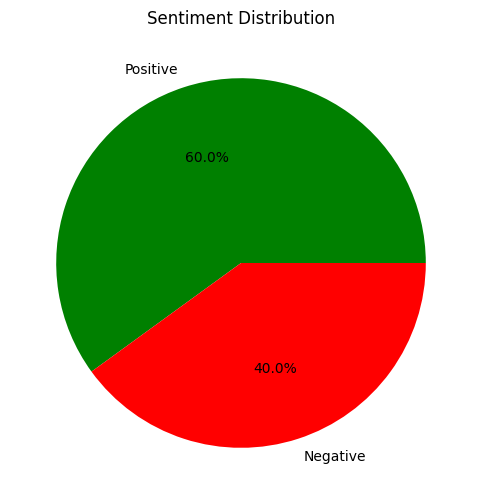

In [15]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

<ipython-input-17-748882711>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


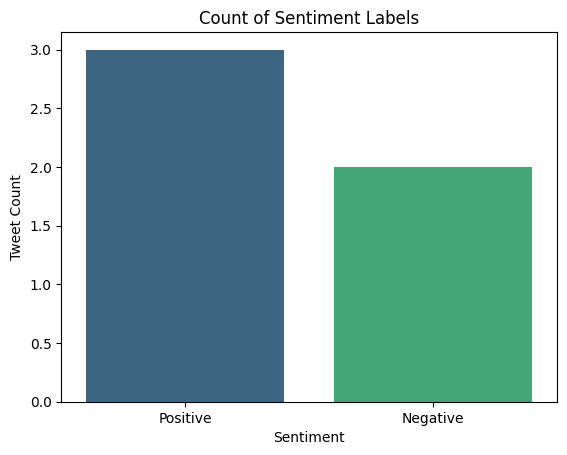

In [17]:
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Count of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [18]:
positive_tweets = " ".join(df[df['sentiment'] == 'Positive']['tweet'])

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

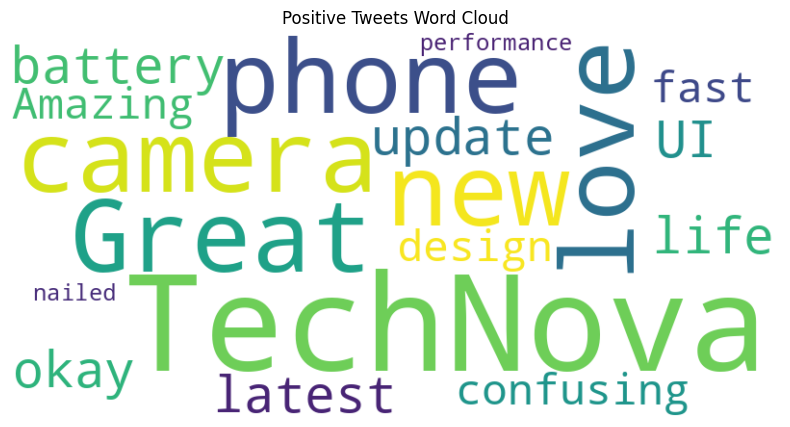

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

In [21]:
negative_tweets = " ".join(df[df['sentiment'] == 'Negative']['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

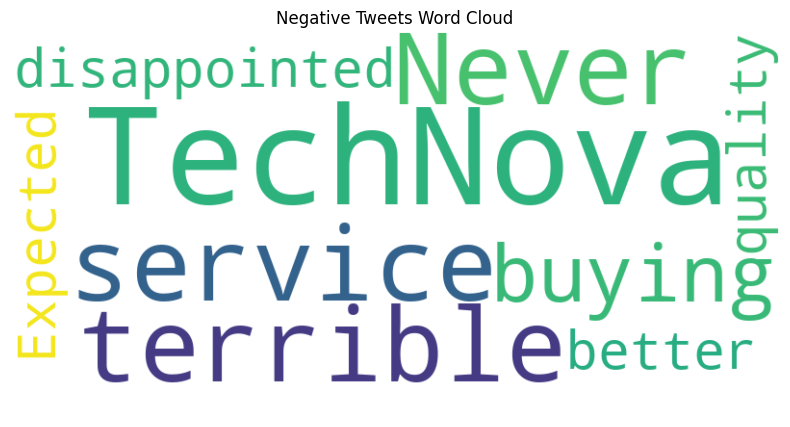

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()